In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
symbolList = ['shield', 'gun', 'bullet', 'unknown']
DATADIR = './data/'
TEST = '_test'
METADATA = ".metadata"
DATA = '.data'

In [21]:
xTrain, yTrain, xTest, yTest = [], [], [], []

for i, sym in enumerate(symbolList, 0):
    meta = DATADIR + sym + METADATA
    data = DATADIR + sym + DATA

    with open(meta, "r") as mf, open(data, "r") as df:
        num = int(mf.readline())
        res = str(df.read())
        featmp = np.array([[float(k) for k in x.strip(',').split(',')] for x in res.strip('\n').split('\n')])
        labtmp = np.full((num), i)
        print(num, featmp[0, :6], labtmp[0])

        xTrain.append(featmp)
        yTrain.append(labtmp)

    meta = DATADIR + sym + TEST + METADATA
    data = DATADIR + sym + TEST + DATA

    with open(meta, "r") as mf, open(data, "r") as df:
        num = int(mf.readline())
        res = str(df.read())
        featmp = np.array([[float(k) for k in x.strip(',').split(',')] for x in res.strip('\n').split('\n')])
        labtmp = np.full((num), i)
        print(num, featmp[0, :6], labtmp[0])

        xTest.append(featmp)
        yTest.append(labtmp)

xTrain = np.concatenate(xTrain)
yTrain = np.concatenate(yTrain)
xTest = np.concatenate(xTest)
yTest = np.concatenate(yTest)

feanum = xTrain.shape[1]

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# for i in range(1, feanum, 2):
#     ax[0].scatter(fea[-1][i], fea[-1][i + 1])

cop = xTrain.copy()
cop2 = xTrain.copy()
for i in range(0, feanum, 3):
    cop[:, i] = 1.0 - cop[:, i]
    cop[:, i+1] = 1.0 - cop[:, i+1]

xTrain = np.concatenate([xTrain, cop])
yTrain = np.concatenate([yTrain, yTrain])

# for i in range(1, feanum, 2):
#     ax[1].scatter(fea[-1][i], fea[-1][i + 1])
# plt.show()

print("\nDone")
print(xTrain)
print(yTrain)
print(xTest)
print(yTest)
print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

222 [ 2.85788387e-01  6.93001986e-01  5.31255068e-07  3.09600592e-01
  5.74217081e-01 -1.74991637e-02] 0
18 [ 3.96264225e-01  4.32041138e-01  4.47287135e-07  4.05311882e-01
  3.52840245e-01 -4.19919146e-03] 0
215 [ 2.57643819e-01  6.77299261e-01  4.37091245e-07  2.87338853e-01
  5.79588473e-01 -8.06115288e-03] 1
21 [ 3.28404784e-01  6.83490217e-01  3.50059167e-07  3.43270332e-01
  6.01036370e-01 -6.59748353e-03] 1
179 [ 3.77705067e-01  7.29104757e-01 -4.01402929e-07  3.92005444e-01
  6.10844851e-01 -1.14211161e-02] 2
24 [ 3.72353971e-01  6.57072306e-01 -3.03545932e-07  3.77229035e-01
  5.77273905e-01 -1.34389708e-02] 2
250 [ 3.17246377e-01  6.84240699e-01  2.17745566e-07  3.78012300e-01
  6.46256506e-01 -1.42971044e-02] 3
17 [ 2.43866712e-01  7.70453691e-01  2.60302812e-07  3.00545126e-01
  7.22399116e-01 -4.11095470e-03] 3

Done
[[ 2.85788387e-01  6.93001986e-01  5.31255068e-07 ...  6.29453540e-01
   6.92976117e-01 -5.60173132e-02]
 [ 2.83837587e-01  6.96782112e-01  5.17131753e-07 ...

In [22]:
class transformer:
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        x = x.copy()
        x = x.reshape(-1, 21, 3)
        x -= x[:, 0:1, :]
        ref = x[:, 9, :]
        refLen = np.linalg.norm(ref, axis=1, keepdims=True)
        x /= refLen[:, None, :]

        return x.reshape(-1, 63)

In [23]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import joblib
from sklearn.model_selection import train_test_split

In [24]:
# xTrain, xTest, yTrain, yTest = train_test_split(fea, lab, test_size=0.02, shuffle=True, stratify=lab)
pl = Pipeline([
    ("TransitionAndScaling", transformer()),
    ("Estimator", XGBClassifier(n_estimators=150, n_jobs=-1))
])

In [25]:
pl.fit(xTrain, yTrain)

Pipeline(steps=[('TransitionAndScaling',
                 <__main__.transformer object at 0x000002804A81B770>),
                ('Estimator',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=-1,
                               num_parallel_tree=None, ...))])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
0.975


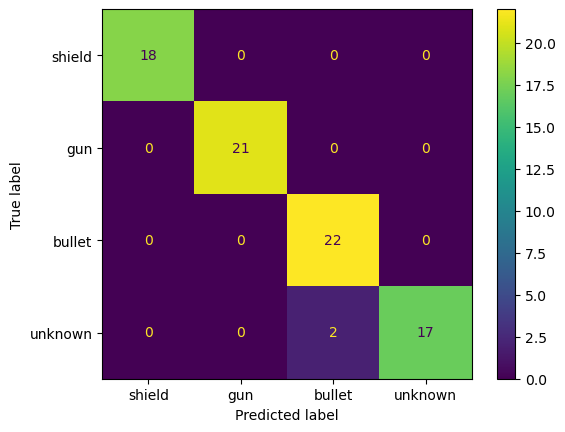

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        22
           3       1.00      0.89      0.94        19

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.98        80
weighted avg       0.98      0.97      0.97        80



In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

pred = pl.predict(xTest)
print(pred)
print(yTest)

print(accuracy_score(pred, yTest))

confMat = confusion_matrix(pred, yTest)
disp = ConfusionMatrixDisplay(confMat, display_labels=symbolList)
disp.plot()
plt.show()

rep = classification_report(pred, yTest)
print(rep)

In [27]:
joblib.dump(pl, "./model/classifier.model")

['./model/classifier.model']